# Original Analysis Case Study
## Part 1 : Graphics Analysis
## Part 2 : Feature Reduction (Extraction/Selection)
## Part 3 : Model Selection and Evaluation

## Part 1 : Graphics Analysis

In this case study, as part of phase I, we will perform exploratory data analysis by graphing the features in the dataset.

The dataset is composed of 10,000 customer's record at a bank. The dataset has a total of 14 features 13 of which can be considered as independent variables and 1 as the dependent variable. The goal is to build a  model that can predict whether a customer is likely to stay or exit the bank. The model will predict the dependent variable 'Exited' using the approrpiate set of independent variables 'CreditScore','Geography','Gender','Age','Tenure','Balance','NumberOfProducts','HasCrCard', and 'IsActiveMember'.

We will perform model selection and model validation exercises and use the model the make the desired prediction. The accuracy and percision of the model will be analyzed in the next phases of the study.



In [1]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xlrd

In [102]:
#Step 1:  Load data into a dataframe
DataFile = "Data/BankCustomers.xlsx"

data = pd.read_excel(DataFile)

In [103]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (10000, 14)


In [104]:
#Step 3:  Look at the data
print(data.head(5))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [105]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())

Describe Data
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min        

In [106]:
# Step 6a: Summary of object type data
print("Summarized Data")
print(data.describe(include=['O']))

Summarized Data
       Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457


In [107]:
# Step 6b: Summary of numeric type data
print("Summarized Data")
print(data.describe(include=np.number))

Summarized Data
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min      

# Histogram of ['Age', 'HasCrCard', 'IsActiveMember', 'Exited']

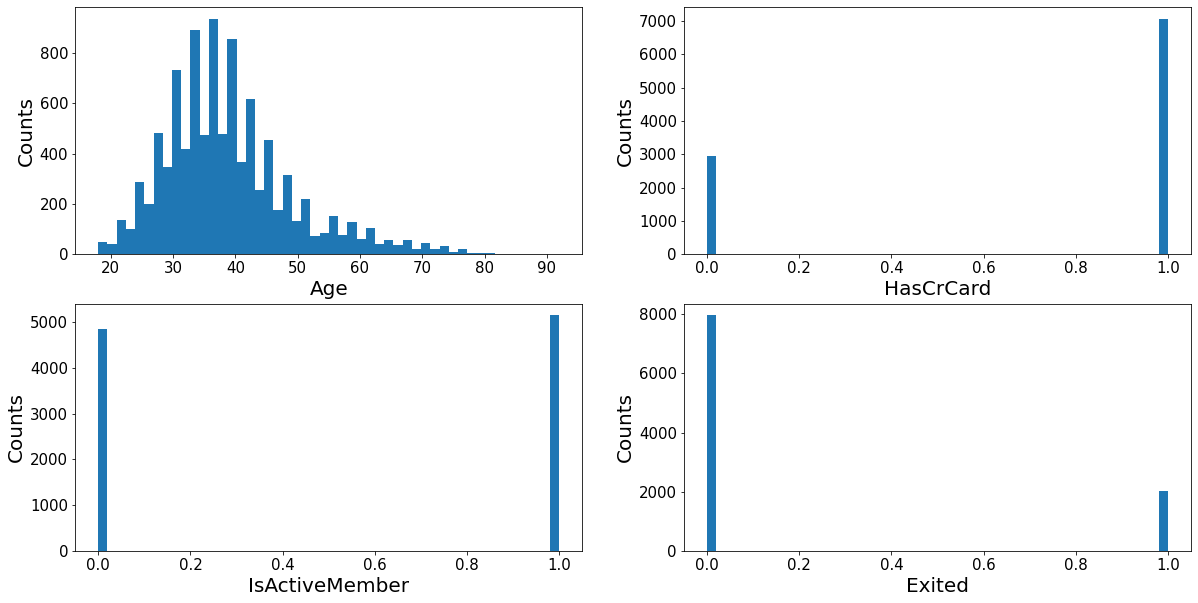

In [108]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'HasCrCard', 'IsActiveMember', 'Exited']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=50)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

# Barchart comparing the number of:

- **Exits vs stays**
- **Males vs. Female**
- **Has credit card vs does not have credit card**
- **active members vs inactive members**

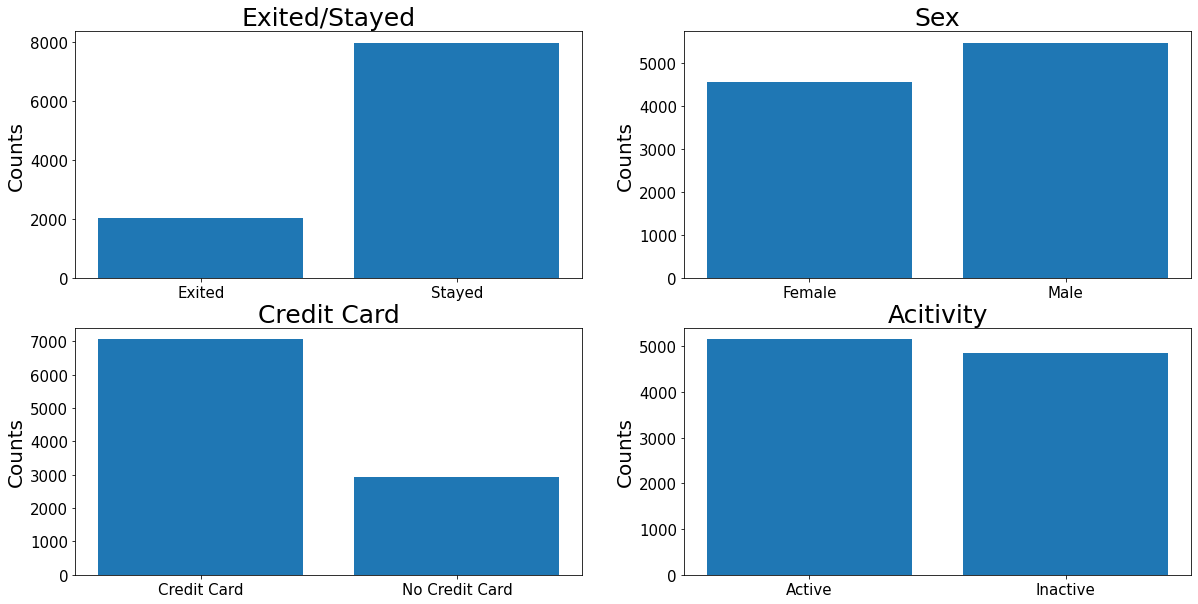

In [109]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Exited = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}}).groupby('Exited').size().reset_index(name='Counts')['Exited']
Y_Exited = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}}).groupby('Exited').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0,0].bar(X_Exited, Y_Exited)
axes[0,0].set_title('Exited/Stayed', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data.groupby('Gender').size().reset_index(name='Counts')['Gender']
Y_Sex = data.groupby('Gender').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0,1].bar(X_Sex, Y_Sex)
axes[0,1].set_title('Sex', fontsize=25)
axes[0,1].set_ylabel('Counts', fontsize=20)
axes[0,1].tick_params(axis='both', labelsize=15)

X_HasCrCard = data.replace({'HasCrCard': {1: 'Credit Card', 0: 'No Credit Card'}}).groupby('HasCrCard').size().reset_index(name='Counts')['HasCrCard']
Y_HasCrCard = data.replace({'HasCrCard': {1: 'Credit Card', 0: 'No Credit Card'}}).groupby('HasCrCard').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1,0].bar(X_HasCrCard, Y_HasCrCard)
axes[1,0].set_title('Credit Card', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)

X_IsActive = data.replace({'IsActiveMember': {1: 'Active', 0: 'Inactive'}}).groupby('IsActiveMember').size().reset_index(name='Counts')['IsActiveMember']
Y_IsActive = data.replace({'IsActiveMember': {1: 'Active', 0: 'Inactive'}}).groupby('IsActiveMember').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1,1].bar(X_IsActive, Y_IsActive)
axes[1,1].set_title('Acitivity', fontsize=25)
axes[1,1].set_ylabel('Counts', fontsize=20)
axes[1,1].tick_params(axis='both', labelsize=15)

# Parallel Coordinate graphe comparing ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

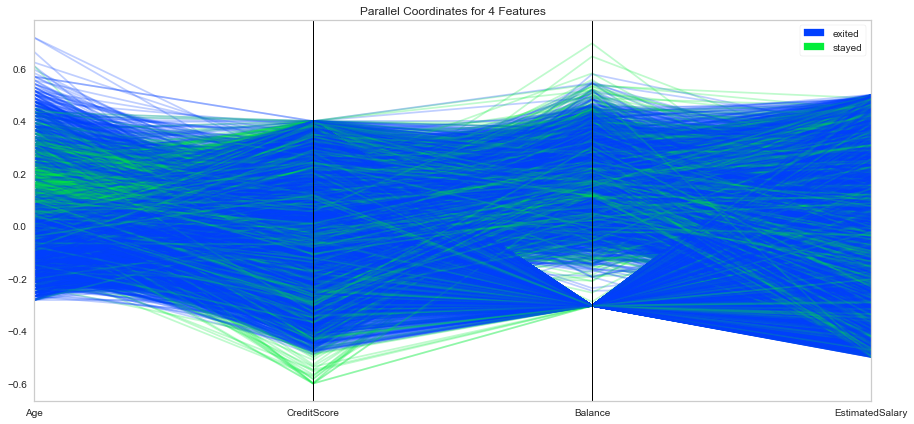

In [112]:
# Step 9:  Compare variables against those who stayed and those who exited
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['exited', 'stayed']
num_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Exited.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="images/pcoords2.png") # Draw/show/poof the data
plt.show();

# Stacked bar charts showing stays and exits based on:

- **Gender**
- **Has Credit card**
- **banking activity**
- **gegraphic location(Country)**

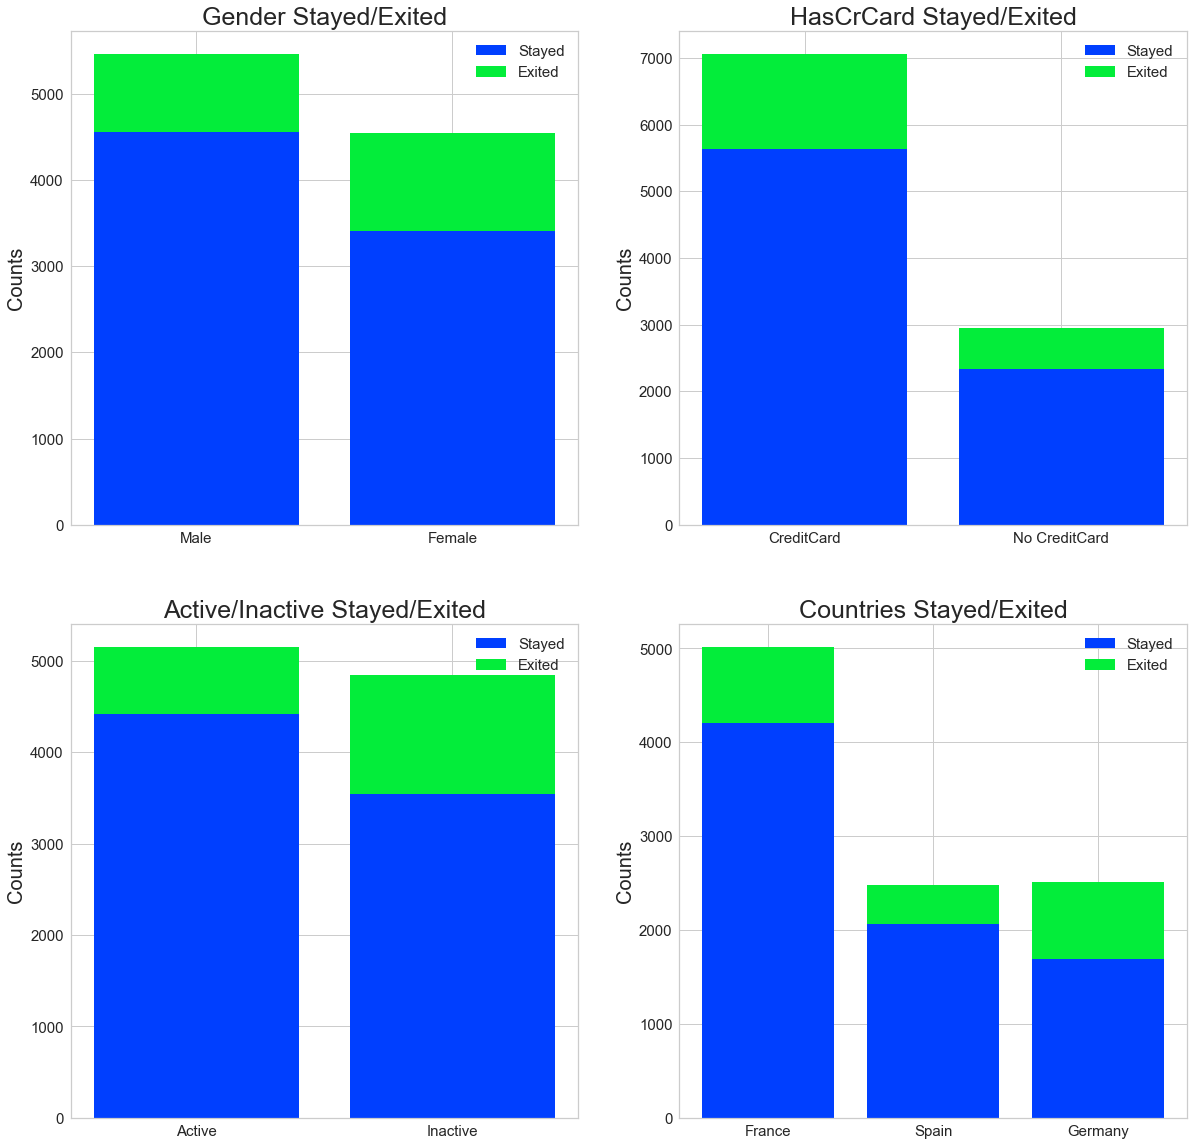

In [113]:
# Step 10 - stacked bar chart to compare Gender exit/stay numbers
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Gender_Stayed = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==0]['Gender'].value_counts()
Gender_Exited = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==1]['Gender'].value_counts()
Gender_Exited = Gender_Exited.reindex(index = Gender_Stayed.index)
# make the bar plot
p1 = axes[0, 0].bar(Gender_Stayed.index, Gender_Stayed.values)
p2 = axes[0, 0].bar(Gender_Exited.index, Gender_Exited.values, bottom=Gender_Stayed.values)
axes[0, 0].set_title('Gender Stayed/Exited', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Stayed', 'Exited'), fontsize = 15)

# make the data read to feed into the visulizer
HasCrCard_Stayed = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==0]
HasCrCard_Stayed = HasCrCard_Stayed.replace({'HasCrCard': {1: 'CreditCard', 0: 'No CreditCard'}})['HasCrCard'].value_counts()

HasCrCard_Exited = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==1]
HasCrCard_Exited = HasCrCard_Exited.replace({'HasCrCard': {1: 'CreditCard', 0: 'No CreditCard'}})['HasCrCard'].value_counts()
HasCrCard_Exited = HasCrCard_Exited.reindex(index = HasCrCard_Stayed.index)
# make the bar plot
p3 = axes[0, 1].bar(HasCrCard_Stayed.index, HasCrCard_Stayed.values)
p4 = axes[0, 1].bar(HasCrCard_Exited.index, HasCrCard_Exited.values, bottom=HasCrCard_Stayed.values)
axes[0, 1].set_title('HasCrCard Stayed/Exited', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Stayed', 'Exited'), fontsize = 15)

# make the data read to feed into the visulizer
IsActive_Stayed = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==0]
IsActive_Stayed = IsActive_Stayed.replace({'IsActiveMember': {1: 'Active', 0: 'Inactive'}})['IsActiveMember'].value_counts()

IsActive_Exited = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==1]
IsActive_Exited = IsActive_Exited.replace({'IsActiveMember': {1: 'Active', 0: 'Inactive'}})['IsActiveMember'].value_counts()
IsActive_Exited = IsActive_Exited.reindex(index = IsActive_Stayed.index)
# make the bar plot
p4 = axes[1,0].bar(IsActive_Stayed.index, IsActive_Stayed.values)
p5 = axes[1,0].bar(IsActive_Exited.index, IsActive_Exited.values, bottom=IsActive_Stayed.values)
axes[1,0].set_title('Active/Inactive Stayed/Exited', fontsize=25)
axes[1,0].set_ylabel('Counts', fontsize=20)
axes[1,0].tick_params(axis='both', labelsize=15)
axes[1,0].legend((p4[0], p5[0]), ('Stayed', 'Exited'), fontsize = 15)


# make the data read to feed into the visulizer
Country_Stayed = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==0]['Geography'].value_counts()

Country_Exited = data.replace({'Exited': {1: 'Exited', 0: 'Stayed'}})[data['Exited']==1]['Geography'].value_counts()
Country_Exited = Country_Exited.reindex(index = Country_Stayed.index)
# make the bar plot
p6 = axes[1,1].bar(Country_Stayed.index, Country_Stayed.values)
p7 = axes[1,1].bar(Country_Exited.index, Country_Exited.values, bottom=Country_Stayed.values)
axes[1,1].set_title('Countries Stayed/Exited', fontsize=25)
axes[1,1].set_ylabel('Counts', fontsize=20)
axes[1,1].tick_params(axis='both', labelsize=15)
axes[1,1].legend((p6[0], p7[0]),('Stayed', 'Exited'), fontsize = 15)
plt.show()

## Part 2 : Feature Reduction (Extraction/Selection)

In [114]:
#Step 1:  Load data into a dataframe
DataFile = "Data/BankCustomers.xlsx"

data = pd.read_excel(DataFile)

In [115]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [116]:
# Step 11- remove unrelated columns
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [117]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [118]:
# Step 12 - Onehot code Geography
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

feature = np.array(data['Geography'])
one_hot = LabelBinarizer()

one_hot.fit_transform(feature)

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [119]:
one_hot.classes_

array(['France', 'Germany', 'Spain'], dtype='<U7')

In [120]:
dummies = pd.get_dummies(feature)
dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [121]:
# Drop Geography column
data = data.drop(['Geography'],axis=1)

In [122]:
# Add dummies
data[dummies.columns] = dummies
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [123]:
# one-hot code Gender
feature = np.array(data['Gender'])
one_hot = LabelBinarizer()

one_hot.fit_transform(feature)
dummies = pd.get_dummies(feature)
dummies

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [124]:
 #drop Gender and add dummies
data = data.drop(['Gender'],axis=1)
data[dummies.columns] = dummies
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [125]:
# Drop spain and male to avoid dummy trap
data = data.drop(['Male','Spain'],axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Female
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [126]:
# Move the dependent variable column to the last position.

Exited = data.replace({'Exited': {1: 'Existed', 0: 'Stayed'}})['Exited']

In [127]:
data = data.drop(['Exited'],axis=1)
data['Exited'] = Exited
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Female,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,Existed
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,Stayed
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,Existed
3,699,39,1,0.00,2,0,0,93826.63,1,0,1,Stayed
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,Stayed


In [128]:
# Step 13 - Set up independet variable and depndent variables and perform feature reduction
Independents = data.iloc[:, :-1].values
print(type(Independents))
Dependent = data.iloc[:,-1].values
print(Dependent)
X = Independents
y = Dependent

<class 'numpy.ndarray'>
['Existed' 'Stayed' 'Existed' ... 'Existed' 'Existed' 'Stayed']


In [129]:
data.shape

(10000, 12)

In [130]:
X.shape

(10000, 11)

In [131]:
y.shape

(10000,)

In [132]:
# Attempt at feature reduction using PCA Before feature scaling
#Load libraries
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", features_pca.shape[1])


Original number of features: 11
Reduced number of features: 2


In [133]:
# Feature scaling will normalize all variable to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-0.32622142  0.29351742 -1.04175968 ...  0.99720391 -0.57873591
   1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ... -1.00280393 -0.57873591
   1.09598752]
 [-1.53679418  0.29351742  1.03290776 ...  0.99720391 -0.57873591
   1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ...  0.99720391 -0.57873591
   1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -1.00280393  1.72790383
  -0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ...  0.99720391 -0.57873591
   1.09598752]]


In [134]:
# Attempt at feature reduction using PCA After feature scaling
#Load libraries
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", features_pca.shape[1])


Original number of features: 11
Reduced number of features: 11


## Part 3 : Model Selection and Evaluation

Summary of parts1 1 and 2:
We have performed feature reduction and scaled the independent variables. The X and y variables are the independent variables dataset and the dependent variables respectively. The value of 0 or 1 for the depended variable has been converted to 'Stayed' and 'Exited" respectively in anticipation of using logistic regression classifier for modeling.

In [135]:
import pandas as pd
import yellowbrick

import warnings
warnings.filterwarnings("ignore")

In [136]:
print("Indpendent variables matrix:\n")
print(X)

Indpendent variables matrix:

[[-0.32622142  0.29351742 -1.04175968 ...  0.99720391 -0.57873591
   1.09598752]
 [-0.44003595  0.19816383 -1.38753759 ... -1.00280393 -0.57873591
   1.09598752]
 [-1.53679418  0.29351742  1.03290776 ...  0.99720391 -0.57873591
   1.09598752]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ...  0.99720391 -0.57873591
   1.09598752]
 [ 1.25683526  0.29351742 -0.69598177 ... -1.00280393  1.72790383
  -0.91241915]
 [ 1.46377078 -1.04143285 -0.35020386 ...  0.99720391 -0.57873591
   1.09598752]]


In [137]:
print("Dependent variable array:\n")
print(y)

Dependent variable array:

['Existed' 'Stayed' 'Existed' ... 'Existed' 'Existed' 'Stayed']


## Step 14 - Split the dataset to 30% test set and 70% training dataset

In [138]:

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=0)

# number of samples in each set
print("Total sample in dataset: ", X.shape[0])

print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])



Total sample in dataset:  10000
No. of samples in training set:  7000
No. of samples in validation set: 3000


In [139]:
print(y_train.shape)

(7000,)


In [145]:
print(y_test.shape)

(3000,)


In [146]:
# stayed and exited
print('\n')
print('No. of customer who stayed and exited in the training set:')
print(pd.Series(y_train).value_counts())





No. of customer who stayed and exited in the training set:
Stayed     5584
Existed    1416
dtype: int64


In [147]:
print('\n')
print('No. of customer who stayed and exited  in the validation set:')
print(pd.Series(y_test).value_counts())





No. of customer who stayed and exited  in the validation set:
Stayed     2379
Existed     621
dtype: int64


## Step 15  - Model evaluation and metrics

#### Create a logistics regression model 

In [148]:

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC  

# Instantiate the classification model
model = LogisticRegression()




#### Define class for 'Exited' and 'stayed' to create confusion metrix and fit it into the trainign sets. Then display the confusion metric

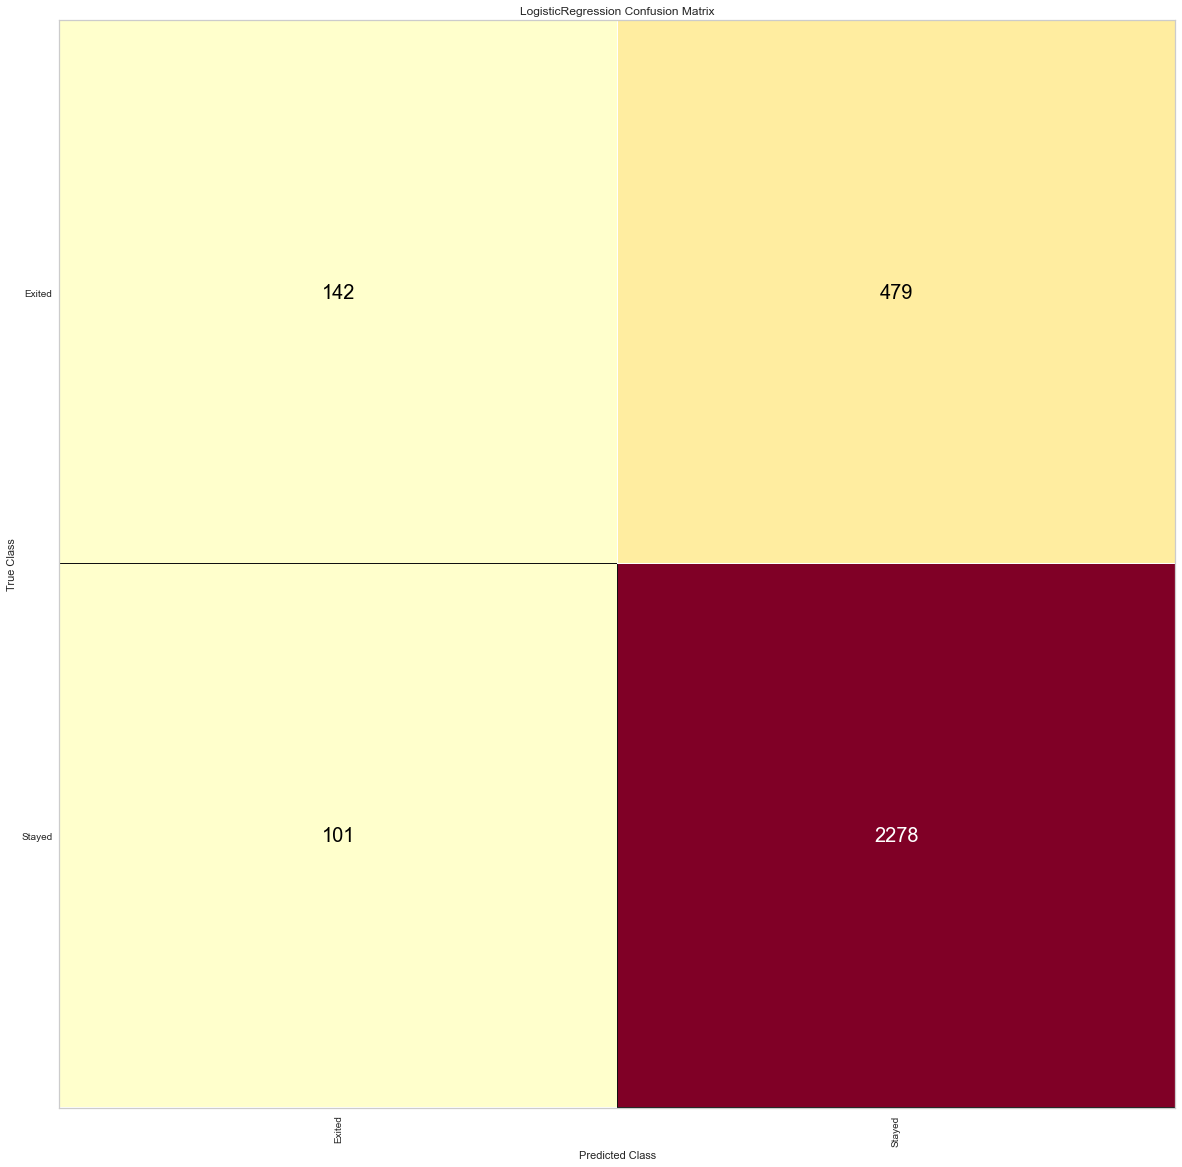

In [150]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Exited','Stayed']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()


#### Precision, Recall, and F1 Score metrics:


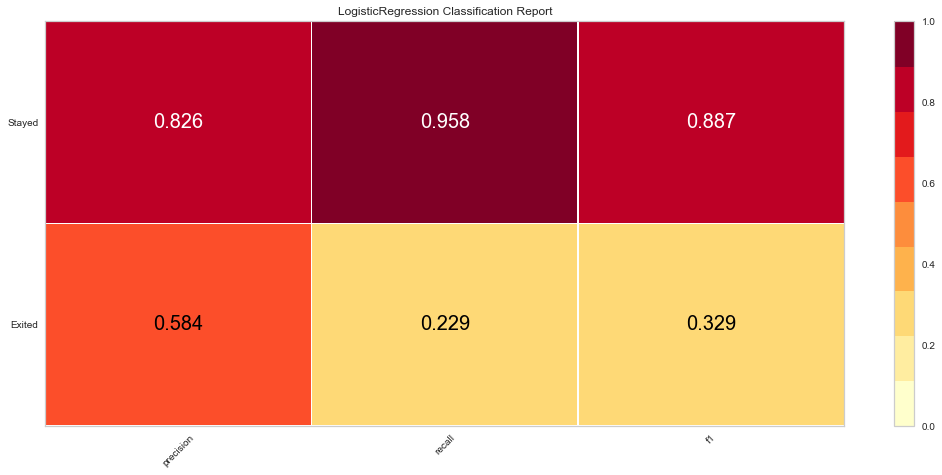

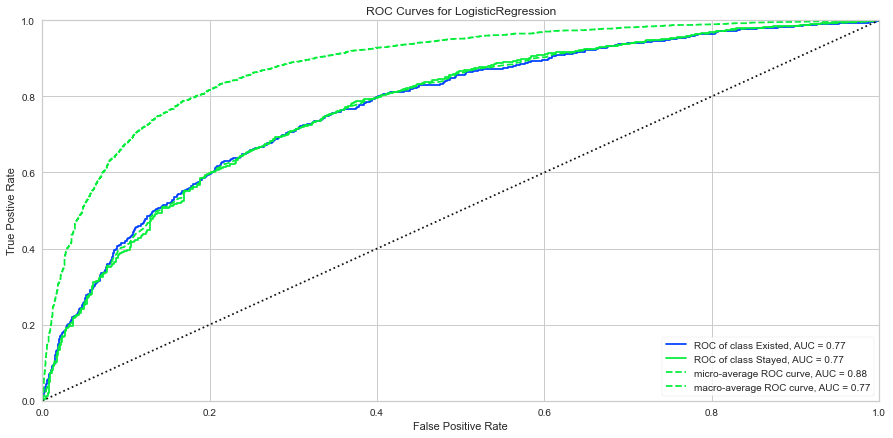

In [154]:

#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# Artificial Neural Network

In [155]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Step 1:  Load data into a dataframe
DataFile = "Data/BankCustomers.xlsx"

dataset = pd.read_excel(DataFile)
print(dataset.shape)
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values



(10000, 14)


In [156]:
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [157]:
y[:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [159]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [160]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [161]:
# Create trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [162]:
# initislize an ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [163]:
# Add the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [164]:
# Add output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [166]:
# Compile
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [167]:
# Train on training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 28us/sample - loss: 0.8499 - acc: 0.3631
Epoch 2/100
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5915 - acc: 0.7391
Epoch 3/100
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5099 - acc: 0.7912
Epoch 4/100
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4689 - acc: 0.7979
Epoch 5/100
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4440 - acc: 0.8011
Epoch 6/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4307 - acc: 0.806 - 0s 21us/sample - loss: 0.4281 - acc: 0.8092
Epoch 7/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4173 - acc: 0.8158
Epoch 8/100
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4080 - acc: 0.8250
Epoch 9/100
8000/8000 [==============================] - 0s 27us/sample - loss: 0.3993 - acc: 0.8311
Epoch 10/100
8000/8000 [=======

In [168]:
print(X_train)

[[-1.00280393 -0.57873591  1.74273971 ...  0.64609167 -1.03067011
   1.10838187]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167  0.97024255
  -0.74759209]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   1.48746417]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   1.41441489]
 [-1.00280393 -0.57873591  1.74273971 ...  0.64609167  0.97024255
   0.84614739]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
   0.32630495]]


In [169]:
# Making prediction using test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [173]:
# making confusion matrix to detrmine accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1518   77]
 [ 190  215]]


#### From CF:

1- TP = 1518
2. TN = 215
3. FN = 77
4. FP = 190

Accuracy = (TP + TN)/(TP + TN + FP + FN) = (1518 + 215)/(1518 + 215 + 190 + 77) = 1733/2000 = .8665 = 86.65%

Given the correlation between independent variables, 86.65 accuracy is adequate.

Recall = TP/(TP + FN) = 1518/(1518+77) = .9117 = 91.17%

Precision = TP/(TP + FN) = 1518/(1518 + 190) = .88875 = 88%

